<a href="https://colab.research.google.com/github/TanyaSri-23/Bootcamp-Project/blob/main/Titanic_Survivors_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic_Survivors_Project


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [135]:
data = pd.read_csv("/content/drive/MyDrive/train (1) (1).csv")

In [136]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [137]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
data.shape

(891, 12)

# Droping columns which have more than 35% of data missing

In [139]:
drop_col = data.isnull().sum()[data.isnull().sum()>35/100 * data.shape[0]]
drop_col
# only column cabin satisfies this condition

Cabin    687
dtype: int64

#  1. **We** can conclude here that Cabin column does not have much significance in deciding the survival rate so we have dropped it

In [140]:
data = data.drop(["Cabin"], axis =1)

In [141]:
data.isnull().sum()
# need to fill the missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [142]:
data.fillna(data.mean(), inplace = True)
data.isnull().sum()
# filled the missing values in age column with age

<ipython-input-142-3751229dd234>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace = True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [143]:
data["Embarked"]
data["Embarked"].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [144]:
# filling missing values with S as its the most frequent occuring value
data["Embarked"].fillna("S", inplace = True)

In [145]:
data.isnull().sum()
# all missing values filled 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [146]:
# now establing relations to draw conclusions
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


# 2. We can see Pclass and Fare have a good correlation (magnitude) i.e when Pclass decreases the Fare increases.

In [147]:
data["Family_size"] = data["SibSp"]+data["Parch"]
data = data.drop(["Parch", "SibSp"], axis =1)
data.corr()

,PassengerId,Survived,Pclass,Age,Fare,Family_size
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
Family_size,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


# 3. There is a good correlation between Pclass and survival rate (approx 33%) So, we can say that passengers from lower classes (rich people)survived more.
 

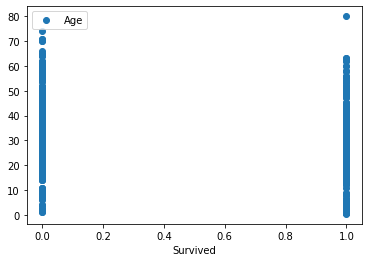

In [148]:
data.plot(x='Survived', y='Age', style='o')
plt.show()

In [149]:
data["Alone"] = [0 if data["Family_size"][i]>0 else 1 for i in data.index]
data["Alone"]

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: Alone, Length: 891, dtype: int64

In [150]:
data.corr()

,PassengerId,Survived,Pclass,Age,Fare,Family_size,Alone
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997,0.135207
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512,0.179775
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138,-0.271832
Family_size,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000,-0.690922
Alone,0.057462,-0.203367,0.135207,0.179775,-0.271832,-0.690922,1.000000


In [151]:
data.groupby(["Alone"])["Survived"].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

# 4. Here we can conclude that if a person had a family he/she had a better survival rate means people with families were prioritized.

# 5. Through the correlation between fare and alone we can say that the person who was alone he/she had a higher ticket fare(since the relation is negative)

In [152]:
data.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

# 6. It is very evident from above output that female passengers had a better rate of survival than male passengers.


In [153]:
data.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

# 7. Now here we can say that the survival rate was highest for passengers with embarkation as C 

# CONCLUSIONS


* #  There is a good correlation between Pclass and survival rate (approx 33%) So, we can say that passengers from lower classes (rich people)survived more.
 
* # It is very evident from above output that female passengers had a better rate of survival than male passengers.

* # We can conclude that if a person had a family he/she had a better survival rate means people with families were prioritized.
*  # We can say that the survival rate was highest for passengers with embarkation as C.
*  # We can conclude here that Cabin column does not have much significance in deciding the survival rate  
*   # Pclass and Fare have a good correlation (magnitude) i.e when Pclass decreases the Fare increases.







In [154]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [155]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [156]:
data= data.drop(["PassengerId", "Name", "Ticket", "Embarked"],axis=1)

In [157]:
Y = data["Survived"]

In [158]:
data= data.drop(["Survived"], axis=1)

In [159]:
data.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Family_size    0
Alone          0
dtype: int64

In [160]:
df = pd.get_dummies(data["Sex"])

In [161]:
data = pd.concat([data,df],axis=1)

In [162]:
data= data.drop(["Sex"],axis=1)

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.3)

In [164]:
len(X_train)

623

In [165]:
data.head()

,Pclass,Age,Fare,Family_size,Alone,female,male
0,3,22.0,7.2500,1,0,0,1
1,1,38.0,71.2833,1,0,1,0
2,3,26.0,7.9250,0,1,1,0
3,1,35.0,53.1000,1,0,1,0
4,3,35.0,8.0500,0,1,0,1


In [168]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [169]:
model.fit(X_train, Y_train)

GaussianNB()

In [170]:
model.score(X_train, Y_train)

0.7817014446227929

In [171]:
model.score(X_test, Y_test)

0.7798507462686567

In [185]:
pred = model.predict(X_test)
pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0])

In [189]:
X_train.head()

,Pclass,Age,Fare,Alone,female,male
384,3,29.699118,7.8958,1,0,1
860,3,41.000000,14.1083,0,0,1
586,2,47.000000,15.0000,1,0,1
756,3,28.000000,7.7958,1,0,1
401,3,26.000000,8.0500,1,0,1


In [211]:
prediction =model.predict([[3,42,53,1,1,0]])
#Pclass=3	Age=42	Fare=53	Alone=1	female=1 male=0

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [212]:
prediction[0]

1